In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=200):
        self.learning_rate, self.iterations = learning_rate, iterations
    def fit(self, X, y):
        b0 = 0
        b1 = 0
        n = X.shape[0]
        for _ in range(self.iterations):
            b0_deri = np.sum(b1*X + b0 - y)/n
            b1_deri = np.sum(X*((b1*X + b0) - y))/n
            b0 = b0 - (self.learning_rate*b0_deri)
            b1 = b1 - (self.learning_rate*b1_deri)
            plt.plot(X,(b0+b1*X))
        self.b0, self.b1 = b0, b1

    def predict(self, X):
        return self.b0 + self.b1*X
    def rmse(self, X):
        rmse = 0
        n = X.shape[0]
        for i in range(n):
            y_pred = self.predict(X[i])
            rmse += (y_pred - y[i])**2
        rmse = np.sqrt(rmse/n)
        return rmse

In [14]:
data = pd.read_csv('headbrain.csv')
# Collecting X and y
X = data['Head Size(cm^3)'].values/1000
y = data['Brain Weight(grams)'].values/1000
print(X)
print(y)

[4.512 3.738 4.261 3.777 4.177 3.585 3.785 3.559 3.613 3.982 3.443 3.993
 3.64  4.208 3.832 3.876 3.497 3.466 3.095 4.424 3.878 4.046 3.804 3.71
 4.747 4.423 4.036 4.022 3.454 4.175 3.787 3.796 4.103 4.161 4.158 3.814
 3.527 3.748 3.334 3.492 3.962 3.505 4.315 3.804 3.863 4.034 4.308 3.165
 3.641 3.644 3.891 3.793 4.27  4.063 4.012 3.458 3.89  4.166 3.935 3.669
 3.866 3.393 4.442 4.253 3.727 3.329 3.415 3.372 4.43  4.381 4.008 3.858
 4.121 4.057 3.824 3.394 3.558 3.362 3.93  3.835 3.83  3.856 3.249 3.577
 3.933 3.85  3.309 3.406 3.506 3.907 4.16  3.318 3.662 3.899 3.7   3.779
 3.473 3.49  3.654 3.478 3.495 3.834 3.876 3.661 3.618 3.648 4.032 3.399
 3.916 4.43  3.695 3.524 3.571 3.594 3.383 3.499 3.589 3.9   4.114 3.937
 3.399 4.2   4.488 3.614 4.051 3.782 3.391 3.124 4.053 3.582 3.666 3.532
 4.046 3.667 2.857 3.436 3.791 3.302 3.104 3.171 3.572 3.53  3.175 3.438
 3.903 3.899 3.401 3.267 3.451 3.09  3.413 3.323 3.68  3.439 3.853 3.156
 3.279 3.707 4.006 3.269 3.071 3.779 3.548 3.292 3.4

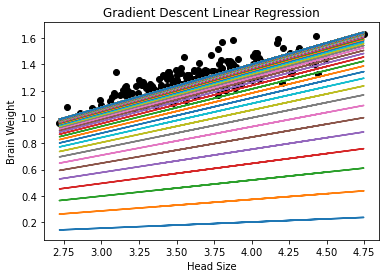

RMSE 0.07574196359651633


In [15]:

clf = GradientDescentLinearRegression()
clf.fit(X,y)
plt.scatter(X,y,color='black')
plt.plot(X, clf.predict(X))
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title("Gradient Descent Linear Regression")
plt.show()
#compute rmse
rmse = clf.rmse(X)
print("RMSE",rmse)